In [1]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

In [2]:
def mean_squred_error(image01, image02):      
    error = np.sum((image01.astype("float") - image02.astype("float"))**2)
    error = error/float(image01.shape[0] * image02.shape[1])
    return error
def image_comparision(image01, image02):
    m = mean_squred_error(image01, image02)
    s = ssim(image01, image02)
    print("Mean Squared Error is {}\nStructural Similarity Index Measure is: {}".format(m, s))

In [3]:
image01 = cv2.imread("cat.jpg")
image02 = cv2.imread("cat2.jpg")

In [4]:
image01 = cv2.cvtColor(image01, cv2.COLOR_BGR2GRAY)
image02 = cv2.cvtColor(image02, cv2.COLOR_BGR2GRAY)

In [5]:
image_angle = 45
image_center = tuple(np.array(image02.shape[1::-1])/2)
image_rotation = cv2.getRotationMatrix2D(image_center, image_angle, 1.0)
imageWrap = cv2.warpAffine(image02, image_rotation, image02.shape[1::-1], flags = cv2.INTER_LINEAR)

In [6]:
cv2.imwrite("../working/AugmentedImage.jpg",imageWrap)

False

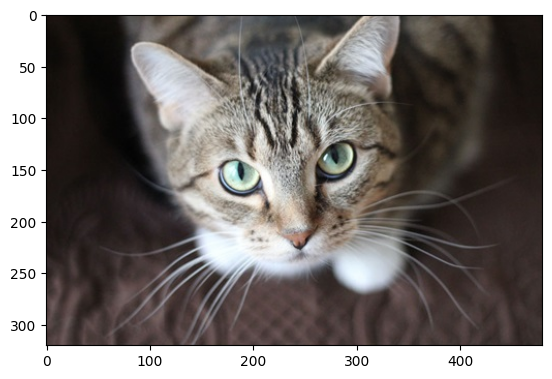

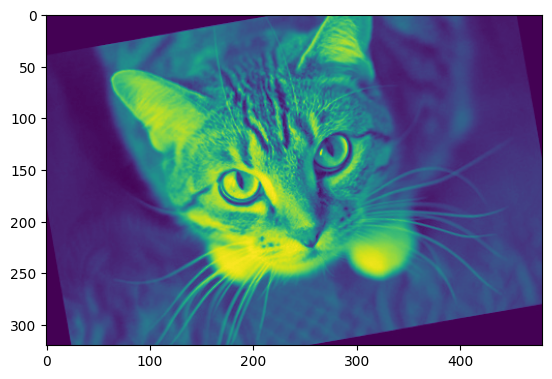

In [7]:
import matplotlib.pyplot as plt
img = plt.imread("AugmentedImage.jpg")
img2 = plt.imread("cat2.jpg")
plt.imshow(img2)
plt.show()
plt.imshow(img)
plt.show()

In [8]:
img = cv2.imread("AugmentedImage.jpg")
img2 = cv2.imread("cat2.jpg")
image01 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image02 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
image_comparision(image01, image02)

Mean Squared Error is 2237.761484375
Structural Similarity Index Measure is: 0.3666442233620015
